# PyTimber Tutorial
<hr style="border-top-width: 4px; border-top-color: #34609b;">

Accessing the CERN logging database and extracting machine parameters.

In [3]:
import pytimber
import time

In [4]:
db = pytimber.LoggingDB()

## Search for parameters

Use the wildcard %

In [5]:
db.search("%BEAM_INTENSITY%")

['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY',
 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY',
 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_HBW',
 'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_LBW',
 'LHC.BCTFR.B6R4.B1:BEAM_INTENSITY',
 'LHC.BCTFR.B6R4.B1:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_HBW',
 'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_LBW',
 'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY',
 'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY_LOBW',
 'LHC.BWCM.B1:BEAM_INTENSITY',
 'LHC.BWCM.B2:BEAM_INTENSITY']

## Explore the parameter tree

use the ipython autocomplete (TAB) to explorer the parameter tree interactively

In [6]:
db.tree.LHC.Beam_Quality.Beam_1.get_vars()

['LHC.BQM.B1:ADC_AQUISITION_MAX',
 'LHC.BQM.B1:ADC_AQUISITION_MIN',
 'LHC.BQM.B1:ADC_WAVEFORM',
 'LHC.BQM.B1:ATTENUATION',
 'LHC.BQM.B1:BUNCH_INTENSITIES',
 'LHC.BQM.B1:BUNCH_INTENSITY_MAX',
 'LHC.BQM.B1:BUNCH_INTENSITY_MEAN',
 'LHC.BQM.B1:BUNCH_INTENSITY_MIN',
 'LHC.BQM.B1:BUNCH_INTENSITY_STDDEV',
 'LHC.BQM.B1:BUNCH_LENGTHS',
 'LHC.BQM.B1:BUNCH_LENGTHS_CUT1',
 'LHC.BQM.B1:BUNCH_LENGTHS_CUT2',
 'LHC.BQM.B1:BUNCH_LENGTHS_CUT3',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT1_MAX',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT1_MEAN',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT1_MIN',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT1_STDDEV',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT2_MAX',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT2_MEAN',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT2_MIN',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT2_STDDEV',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT3_MAX',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT3_MEAN',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT3_MIN',
 'LHC.BQM.B1:BUNCH_LENGTH_CUT3_STDDEV',
 'LHC.BQM.B1:BUNCH_LENGTH_MAX',
 'LHC.BQM.B1:BUNCH_LENGTH_MEAN',
 'LHC.BQM.B1:BUNCH_LENGTH_MIN',
 'LHC.BQM.B1:BUN

## Get Data

Specify a variable name and a timestamp or an interval. Data is always returned as a dictionary of timestamp, values arrays.


In [7]:
db.get("HX:FILLN",time.time())

{'HX:FILLN': (array([  1.49807956e+09]), array([ 5856.]))}

### Scaling algorithms

getScaled can be used to exploit the time scaling functionality of Timber. Specify 
- the scale Interval (an integer) 
- the scaleSize (one of ['SECOND', 'MINUTE', 'HOUR', 'DAY', 'WEEK', 'MONTH', 'YEAR'])  
- the scaling algorithm (one of ['MAX','MIN','AVG','COUNT','SUM','REPEAT','INTERPOLATE'])

In [8]:
db.getScaled('MSC01.ZT8.107:COUNTS','2016-08-03 16:30:00.000','2016-08-03 18:30:00.000',
             timescaleAlgorithm='SUM', scaleSize='MINUTE', timescaleInterval='1')

{'MSC01.ZT8.107:COUNTS': (array([  1.47023460e+09,   1.47023466e+09,   1.47023472e+09,
           1.47023478e+09,   1.47023484e+09,   1.47023490e+09,
           1.47023496e+09,   1.47023502e+09,   1.47023508e+09,
           1.47023514e+09,   1.47023520e+09,   1.47023526e+09,
           1.47023532e+09,   1.47023538e+09,   1.47023544e+09,
           1.47023550e+09,   1.47023556e+09,   1.47023562e+09,
           1.47023568e+09,   1.47023574e+09,   1.47023580e+09,
           1.47023586e+09,   1.47023592e+09,   1.47023598e+09,
           1.47023604e+09,   1.47023610e+09,   1.47023616e+09,
           1.47023622e+09,   1.47023628e+09,   1.47023634e+09,
           1.47023640e+09,   1.47023646e+09,   1.47023652e+09,
           1.47023658e+09,   1.47023664e+09,   1.47023670e+09,
           1.47023676e+09,   1.47023682e+09,   1.47023688e+09,
           1.47023694e+09,   1.47023700e+09,   1.47023706e+09,
           1.47023712e+09,   1.47023718e+09,   1.47023724e+09,
           1.47023730e+09,   1.

In [9]:
now=time.time()
"The unixtime `%.3f` correspond to `%s` local time."%(now,pytimber.dumpdate(now))

'The unixtime `1498117494.614` correspond to `2017-06-22 09:44:54.613` local time.'

In [10]:
db.get("HX:FILLN",time.time())

{'HX:FILLN': (array([  1.49807956e+09]), array([ 5856.]))}

In [11]:
db.get("HX:FILLN",'2016-08-03 16:30:00.000')

{'HX:FILLN': (array([  1.47022719e+09]), array([ 5160.]))}

In [12]:
db.get("HX:FILLN",'2016-08-03 16:30:00.000',unixtime=False)

{'HX:FILLN': (array([datetime.datetime(2016, 8, 3, 14, 26, 27, 234000)], dtype=object),
  array([ 5160.]))}

In [13]:
db.get("HX:FILLN",'2016-08-02 16:30:00.000','next')

{'HX:FILLN': (array([  1.47015166e+09]), array([ 5156.]))}

In [14]:
db.get("HX:FILLN",'2016-08-02 16:30:00.000','2016-08-03 16:30:00.000')

{'HX:FILLN': (array([  1.47015166e+09,   1.47019695e+09,   1.47019821e+09,
           1.47020552e+09,   1.47022719e+09]),
  array([ 5156.,  5157.,  5158.,  5159.,  5160.]))}

## Variables

Variables can be given as a string, as a pattern, as a list of strings.

In [15]:
db.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY",now)

{'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([  1.49811749e+09]),
  array([  1.97829365e+14]))}

In [16]:
db.get("LHC.BCTDC.A6R4.B%:BEAM_INTENSITY",now)

{'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([  1.49811749e+09]),
  array([  1.97829365e+14])),
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY': (array([  1.49811749e+09]),
  array([  2.09327495e+14]))}

In [17]:
db.get(["LHC.BCTDC.A6R4.B1:BEAM_INTENSITY","LHC.BCTDC.A6R4.B2:BEAM_INTENSITY"],now)

{'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([  1.49811749e+09]),
  array([  1.97829365e+14])),
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY': (array([  1.49811749e+09]),
  array([  2.09327495e+14]))}

## Values

Values can be scalar (floating point values or string) or vectors. If in a query the length of the vectors is the same, as 2D array is returned, else a list of arrays is returned instead.

In [18]:
# prepare for plotting
%matplotlib notebook
import matplotlib.pyplot as pl

<IPython.core.display.Javascript object>


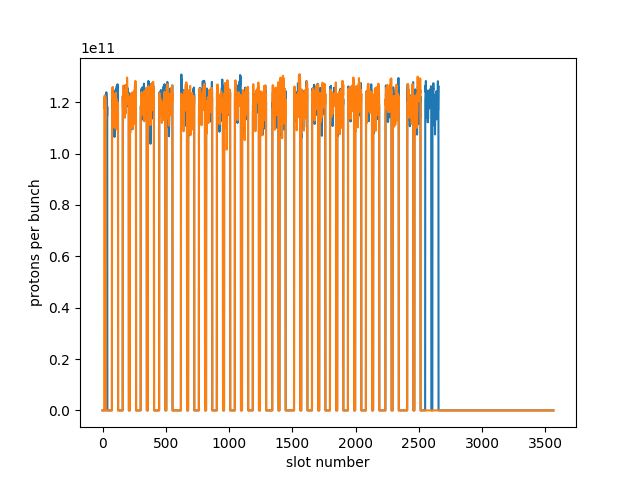

In [19]:
ts=pytimber.parsedate("2016-07-01 03:10:15.000")
ib1="LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY"
ib2="LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY"
data=db.get([ib1,ib2],ts,'next')
timestamps,valuesb1=data[ib1]
timestamps,valuesb2=data[ib2]
pl.figure()
pl.plot(valuesb1[0])
pl.plot(valuesb2[0])
pl.xlabel("slot number")
pl.ylabel("protons per bunch")

In [20]:
ts=pytimber.parsedate("2016-07-01 03:10:15.000")
ib1="LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY"
ib2="LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY"
data=db.get([ib1,ib2],ts,ts+60)
timestamps,valuesb1=data[ib1]
timestamps,valuesb2=data[ib2]

<IPython.core.display.Javascript object>


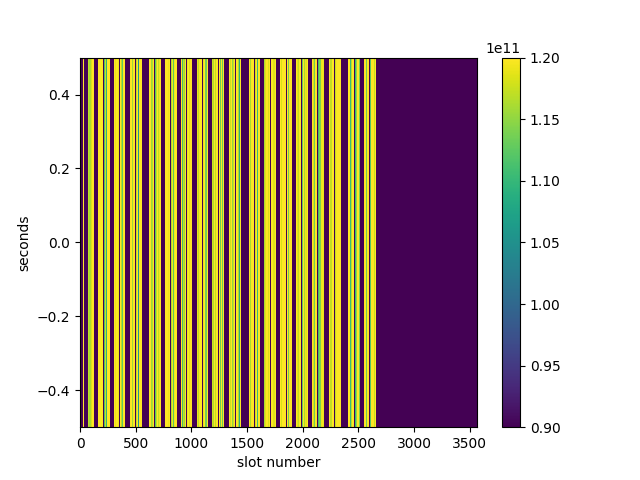

In [21]:
pl.figure()
pl.imshow(valuesb1,aspect='auto',origin='bottom')
pl.ylabel('seconds'); pl.xlabel("slot number")
pl.colorbar(); pl.clim(9e10,12e10)

<IPython.core.display.Javascript object>


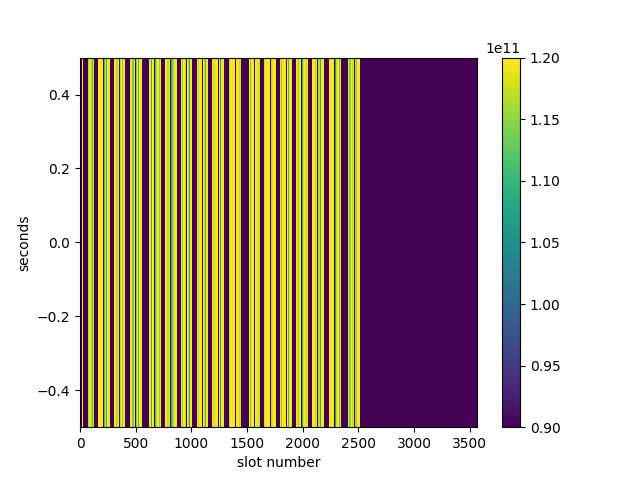

In [22]:
pl.figure()
pl.imshow(valuesb2,aspect='auto',origin='bottom')
pl.ylabel('seconds'); pl.xlabel("slot number")
pl.colorbar(); pl.clim(9e10,12e10)